<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.258078,62.879645,637.193152,752.330874,2.597216,749.733659
1,0.0,1.0,93.435147,87.968103,-909.231371,-717.828122,-644.505081,-73.323040
2,0.0,2.0,92.358208,34.140978,-393.698249,-257.199063,-365.898950,108.699887
3,0.0,3.0,65.688025,89.446206,-660.354834,-495.220603,-368.636210,-126.584393
4,0.0,4.0,79.215593,31.620962,-237.717912,-116.881357,-219.222166,102.340809
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,95.775526,54.842887,-701.183830,-540.565417,363.244142,-903.809559
29996,999.0,26.0,85.790216,66.140398,1463.791528,1625.722142,397.309798,1228.412344
29997,999.0,27.0,81.507218,31.105797,-14.249194,108.363821,279.037686,-170.673864
29998,999.0,28.0,70.461393,27.571916,174.944085,282.977394,263.304260,19.673134


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.258078,62.879645,637.193152,752.330874,2.597216,749.733659
1,0.0,1.0,93.435147,87.968103,-909.231371,-717.828122,-644.505081,-73.323040
2,0.0,2.0,92.358208,34.140978,-393.698249,-257.199063,-365.898950,108.699887
3,0.0,3.0,65.688025,89.446206,-660.354834,-495.220603,-368.636210,-126.584393
4,0.0,4.0,79.215593,31.620962,-237.717912,-116.881357,-219.222166,102.340809
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,95.775526,54.842887,-701.183830,-540.565417,363.244142,-903.809559
29996,999.0,26.0,85.790216,66.140398,1463.791528,1625.722142,397.309798,1228.412344
29997,999.0,27.0,81.507218,31.105797,-14.249194,108.363821,279.037686,-170.673864
29998,999.0,28.0,70.461393,27.571916,174.944085,282.977394,263.304260,19.673134


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.258078,62.879645,637.193152,752.330874,2.597216,749.733659
1,0.0,1.0,93.435147,87.968103,-909.231371,-717.828122,-644.505081,-73.323040
2,0.0,2.0,92.358208,34.140978,-393.698249,-257.199063,-365.898950,108.699887
3,0.0,3.0,65.688025,89.446206,-660.354834,-495.220603,-368.636210,-126.584393
4,0.0,4.0,79.215593,31.620962,-237.717912,-116.881357,-219.222166,102.340809
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,95.775526,54.842887,-701.183830,-540.565417,363.244142,-903.809559
29996,999.0,26.0,85.790216,66.140398,1463.791528,1625.722142,397.309798,1228.412344
29997,999.0,27.0,81.507218,31.105797,-14.249194,108.363821,279.037686,-170.673864
29998,999.0,28.0,70.461393,27.571916,174.944085,282.977394,263.304260,19.673134


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

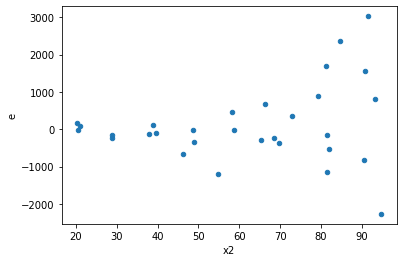

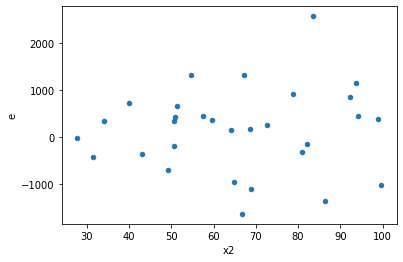

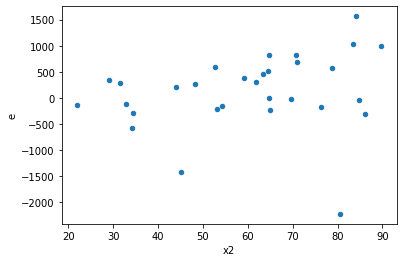

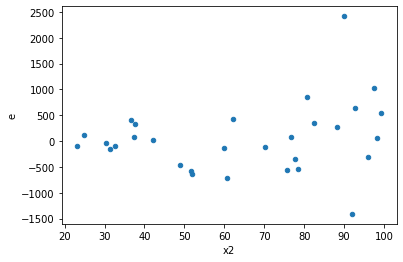

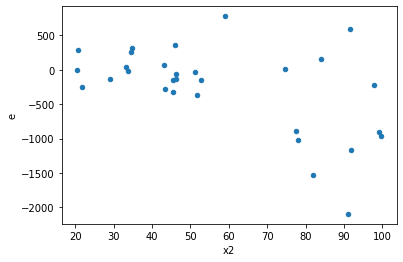

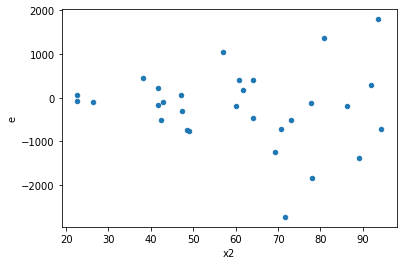

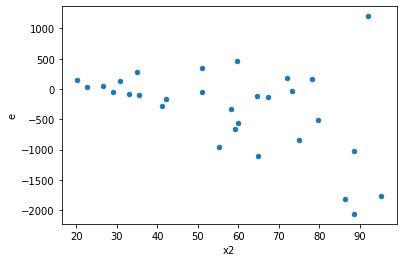

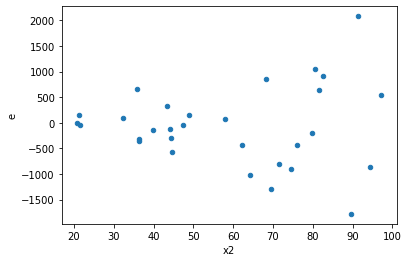

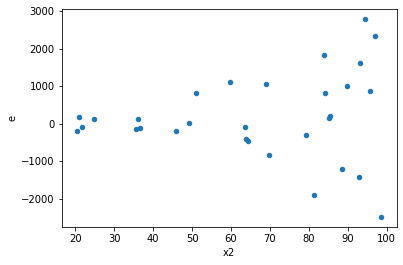

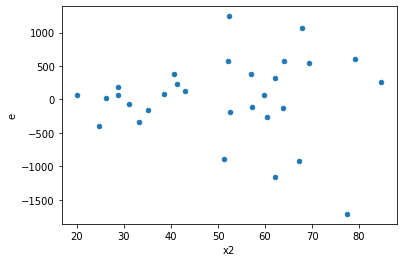

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,320847.545020042,4582073.391855738,32084.754502004198,458207.3391855738,14.281154594994689,0.00024179871703555733,0.9998791006414822,0.00012089935851777867,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,655043.5717615646,9160403.608212154,65504.35717615646,916040.3608212154,13.984418751836152,0.0002654975930649339,0.9998672512034675,0.00013274879653246696,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,1152512.798744826,2351999.3092742953,115251.27987448261,235199.93092742952,2.0407576487096724,0.27614740832440177,0.8619262958377991,0.13807370416220088,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,753374.0666418909,12613195.401022378,75337.4066641891,1261319.5401022378,16.74227446830598,0.00011829449617017929,0.9999408527519149,5.914724808508964e-05,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,750720.4971322223,14936207.884945944,75072.04971322222,1493620.7884945944,19.895830661348352,5.3769115735624595e-05,0.9999731154421322,2.6884557867812298e-05,Reject005=0 : Heteroscedasticity
5.0,10.0,10.0,665278.3922533486,9554288.287496755,66527.83922533486,955428.8287496755,14.361338649727752,0.00023583578680996808,0.999882082106595,0.00011791789340498404,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,1341501.1356454685,21973791.335704923,134150.11356454686,2197379.1335704923,16.380002037890296,0.00013061242459411204,0.9999346937877029,6.530621229705602e-05,Reject005=0 : Heteroscedasticity
7.0,10.0,10.0,817070.9871142473,19144094.613000687,81707.09871142473,1914409.4613000688,23.43014856103789,2.5209975270445995e-05,0.9999873950123648,1.2604987635222997e-05,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,2535765.4819601164,15303019.934865281,253576.54819601163,1530301.993486528,6.0348719326505815,0.008860522520035774,0.9955697387399821,0.004430261260017887,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,320847.545020042,4582073.391855738,32084.754502004198,458207.3391855738,14.281154594994689,0.00024179871703555733,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,655043.5717615646,9160403.608212154,65504.35717615646,916040.3608212154,13.984418751836152,0.0002654975930649339,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,1152512.798744826,2351999.3092742953,115251.27987448261,235199.93092742952,2.0407576487096724,0.27614740832440177,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,753374.0666418909,12613195.401022378,75337.4066641891,1261319.5401022378,16.74227446830598,0.00011829449617017929,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,750720.4971322223,14936207.884945944,75072.04971322222,1493620.7884945944,19.895830661348352,5.3769115735624595e-05,Reject005=0 : Heteroscedasticity
5.0,10.0,10.0,665278.3922533486,9554288.287496755,66527.83922533486,955428.8287496755,14.361338649727752,0.00023583578680996808,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,1341501.1356454685,21973791.335704923,134150.11356454686,2197379.1335704923,16.380002037890296,0.00013061242459411204,Reject005=0 : Heteroscedasticity
7.0,10.0,10.0,817070.9871142473,19144094.613000687,81707.09871142473,1914409.4613000688,23.43014856103789,2.5209975270445995e-05,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,2535765.4819601164,15303019.934865281,253576.54819601163,1530301.993486528,6.0348719326505815,0.008860522520035774,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    917
Reject005=1 : Homoscedasticity       83
Name: Result_test, dtype: int64